<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/mcmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Markov Chain Monte Carlo (MCMC)**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Various types of random walks are of interest, which can differ in several ways. The term itself most often refers to a special category of Markov chains or Markov processes, but many time-dependent processes are referred to as random walks, with a modifier indicating their specific properties. Random walks (Markov or not) can also take place on a variety of spaces: commonly studied ones include graphs, others on the integers or the real line, in the plane or higher-dimensional vector spaces, on curved surfaces or higher-dimensional Riemannian manifolds, and also on groups finite, finitely generated or Lie.

## **Components**

**Monte Carlo Process**

* Monte Carlo can be thought of as carrying out many experiments, each time changing the variables in a model and observing the response. 

* By choosing random values, we can explore a large portion of the parameter space, the range of possible values for the variables. A parameter space for our problem using normal priors for the variables (more on this in a moment) is shown below.

* Clearly we cannot try every single point in these plots, but by randomly sampling from regions of higher probability (red) we can create the most likely model for our problem.

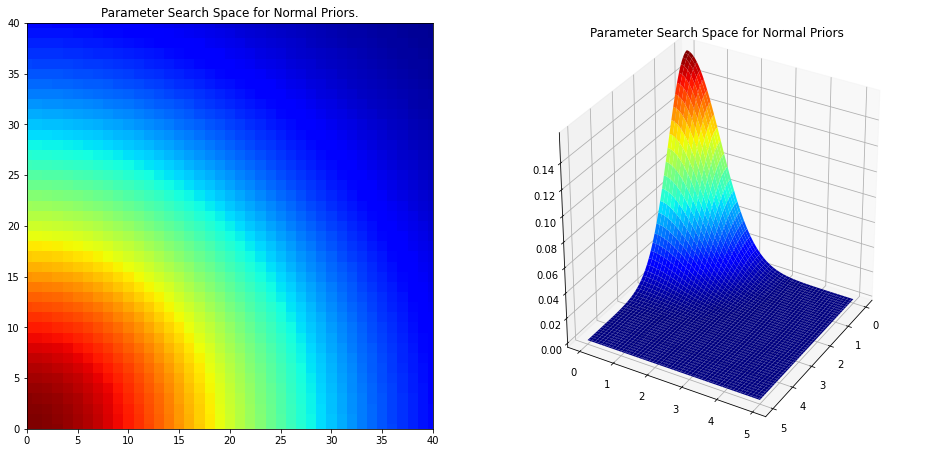

In [ ]:
import scipy.stats as stats
from IPython.core.pylabtools import figsize
figsize(16, 8)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

jet = plt.cm.jet
fig = plt.figure()
x = y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

plt.subplot(121)
norm_x = stats.norm.pdf(x, loc=0, scale=1)
norm_y = stats.norm.pdf(y, loc=0, scale=1)
M = np.dot(norm_x[:, None], norm_y[None, :])
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet)

plt.xlim(0, 40)
plt.ylim(0, 40)
plt.title("Parameter Search Space for Normal Priors.")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=plt.cm.jet)
ax.view_init(azim=390)
plt.title("Parameter Search Space for Normal Priors");

**Markov Chain**

* A Markov Chain is a process where the next state depends only on the current state. (A state in this context refers to the assignment of values to the parameters). 

* A Markov Chain is memoryless because only the current state matters and not how it arrived in that state. 

* The concept of a Markov Chain is that we do not need to know the entire history of a process to predict the next output, an approximation that works well in many real-world situations.

**Markov Chain Monte Carlo (MCMC)**

* Markov Chain Monte Carlo refers to a **class of methods** for sampling from a probability distribution in order to **construct the most likely distribution**. 

* We cannot directly calculate the (i.e. logistic) distribution, so instead we generate thousands of values — called samples — for the parameters of the function (alpha and beta) to **create an approximation of the distribution**. 

* The idea behind MCMC is that as we generate more samples, our approximation gets closer and closer to the actual true distribution.

* Markov Chain and Monte Carlo, MCMC is a method that repeatedly draws random values for the parameters of a distribution based on the current values. Each sample of values is random, but the choices for the values are limited by the current state and the assumed prior distribution of the parameters. 

* MCMC can be considered as a **random walk** that gradually converges to the true distribution.

**MCMC Algorithms: Metropolis Hastings**

In order to connect our observed data to the model, every time a set of random values are drawn, the algorithm evaluates them against the data. If they do not agree with the data (simplified!), the values are rejected and the model remains in the current state. If the random values are in agreement with the data, the values are assigned to the parameters and become the current state. This process continues for a specified number of steps, with the accuracy of the model improving with the number of steps.

1. Select an initial set of values for alpha and beta, the parameters of the (logistic) function.
2. Randomly assign new values to alpha and beta based on the current state.
3. Check if the new random values agree with the observations. If they do not, reject the values and return to the previous state. If they do, accept the values as the new current state.
4. Repeat steps 2 and 3 for the specified number of iterations.


## **Simulate MCMC**